In [1]:
#Importar librerias necesarias

import dnaplotlib as dpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from skimage import io
%matplotlib inline 

In [2]:
# Crear el renderer de dnaplotlib
dr = dpl.DNARenderer()
part_renderers = dr.SBOL_part_renderers()

In [3]:
# Crear el constructo programable para graficar
sp = {'type':'EmptySpace', 'name':'S1', 'fwd':True, 'opts':{'x_extent':1}}
prom = {'type':'Promoter', 'name':'prom', 'fwd':True}
ins  = {'type':'Insulator', 'name':'ins', 'fwd':True}
ribo_f = {'type':'Ribozyme', 'name':'ribo', 'fwd':True}
rbs_f = {'type':'RBS', 'name':'rbs', 'fwd':True, 'opts':{'color':(0.0,0.0,0.0)}}
cds_f = {'type':'CDS', 'name':'cds', 'fwd':True, 'opts':{'color':(0.8828125, 0.32421875, 0.01171875), 'x_extent':80}}
cds1_f = {'type':'CDS', 'name':'cds', 'fwd':True, 'opts':{'color':(0.01171875, 0.8828125, 0.33203125), 'x_extent':80}}
cds2_f = {'type':'CDS', 'name':'cds', 'fwd':True, 'opts':{'color':(0.33203125, 0.01171875, 0.8828125), 'x_extent':80}}
term = {'type':'Terminator', 'name':'term', 'fwd':True}

In [4]:
# Crear el diseno base
design1 = [sp, prom, ins, cds1_f, cds2_f, cds_f, term, sp]

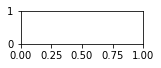

In [5]:
# Crear la figura
fig = plt.figure(figsize=(2.2,0.6))
gs = gridspec.GridSpec(1, 1)
ax_dna = plt.subplot(gs[0])

In [7]:
# Renderiar el ADN al eje
start, end = dr.renderDNA(ax_dna, design1, part_renderers)
ax_dna.set_xlim([start, end])
ax_dna.set_ylim([-15,28])
ax_dna.set_aspect('equal')
ax_dna.set_xticks([])
ax_dna.set_yticks([])
ax_dna.axis('off')

(0.0, 286.0, -15.0, 28.0)

In [8]:
# Crear un diseno sobre la base ya fabricada
primer_f_opts = {'color':(1.0,1.0,0.0), 'y_offset':10}
primer_f_opts2 = {'color':(1.0,0.0,0.0), 'y_offset':15}
primer_r_opts = {'color':(1.0,0.0,1.0), 'y_offset':10}
rbs2_f_opts = {'color':(1.0,0.0,0.0), 'x_extent':7.5} #El x_extend da idea del tamano de la pieza
rbs3_f_opts = {'color':(1.0,0.0,0.0), 'x_extent':5}
primer1_f = {'type':'PrimerBindingSite', 'start': cds_f['start'], 'end': cds_f['end'], 'name':'pri1f', 'fwd':True, 'opts':primer_f_opts}
primer2_f = {'type':'PrimerBindingSite', 'start': cds_f['start']+10, 'end': cds_f['end'], 'name':'pri2f', 'fwd':True, 'opts':primer_f_opts2}
primer3_f = {'type':'PrimerBindingSite', 'start': cds_f['start']+50, 'end': cds_f['end'], 'name':'pri3f', 'fwd':True, 'opts':primer_f_opts}
primer4_r = {'type':'PrimerBindingSite', 'start': cds_f['end']-25, 'end': cds_f['end']-35, 'name':'pri4r', 'fwd':False, 'opts':primer_r_opts}
rbs2_f = {'type':'RBS', 'start': cds_f['start']+40, 'end': cds_f['start']+41, 'name':'rbs2f', 'fwd':True, 'opts':rbs2_f_opts}
rbs3_f = {'type':'RBS', 'start': cds_f['start']+70, 'end': cds_f['start']+71, 'name':'rbs3f', 'fwd':True, 'opts':rbs3_f_opts}


In [9]:
# Renderiar las anotaciones al diseño
dr.annotate(ax_dna, part_renderers, primer1_f)
dr.annotate(ax_dna, part_renderers, primer2_f)
dr.annotate(ax_dna, part_renderers, primer3_f)
dr.annotate(ax_dna, part_renderers, primer4_r)
dr.annotate(ax_dna, part_renderers, rbs2_f)
dr.annotate(ax_dna, part_renderers, rbs3_f)

In [10]:
# Update subplot spacing
plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)

<Figure size 432x288 with 0 Axes>

In [11]:
# Guardar la figura
fig.savefig('annotate_design.pdf', transparent=True)
fig.savefig('annotate_design.png', dpi=300)


In [12]:
# Limpiar cache del plotting
plt.close('all')

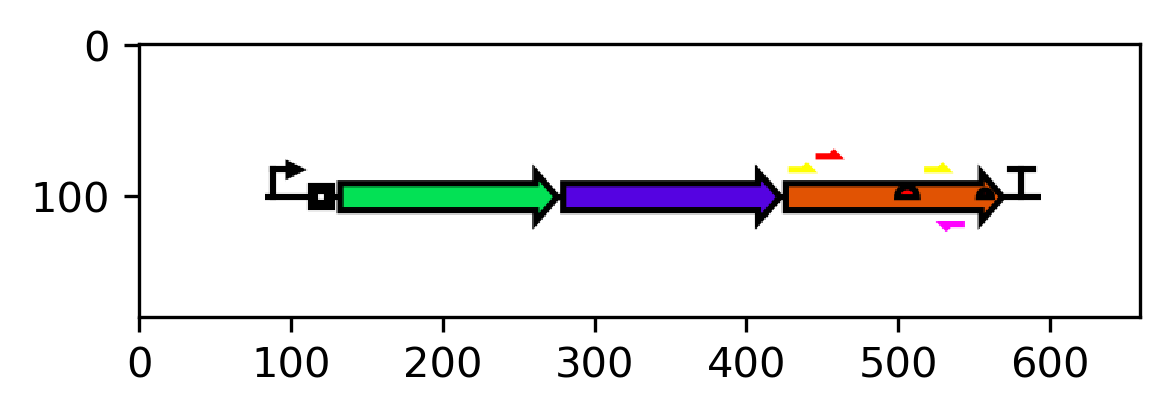

In [13]:
#Solo para ver cambios realizados en el codigo mas rapido
img = io.imread('annotate_design.png')
plt.figure(figsize=(4, 4), dpi=300)
io.imshow(img, cmap = 'gray')

In [16]:
def RGB01converter(rgbcode):
    rgb01 = (rgbcode[0]/256,rgbcode[1]/256,rgbcode[2]/256)
    print (rgb01)

In [17]:
rgbcode = (85, 3, 226)

RGB01converter(rgbcode)

(0.33203125, 0.01171875, 0.8828125)
